### Exploration of Ising Model Properties

1a) We first need to check if the data has reached thermal equilibrium. This can be achieved by plotting the running average of a quantity of interest, such as energy or magnetization, as a function of Monte Carlo iteration or, in the case of our data, sample number.

Let's first take a look at the files we will be working with:

In [4]:
!tail Data/L_16_T_1.0.dat

-511.2944    255.8208     261428.0384     65444.6816
-511.2784    255.8168     261411.7568     65442.6384
-511.2112    255.8     261343.1232     65434.048
-511.352    255.836     261486.2144     65452.408
-511.3584    255.8376     261492.5888     65453.2144
-511.2144    255.8     261346.6816     65434.0736
-511.3168    255.8248     261450.6176     65446.7184
-511.3104    255.8248     261444.2688     65446.7216
-511.3264    255.828     261459.9488     65448.3184
-511.3264    255.8256     261460.3712     65447.1392


In the data file above, there are four columns corresponding to: energy, magnetization, energy squared, and magnetization squared. The rows corresponding to various samples that themselves were averaged already by accumulating the corresponding observable and averaging over a parameter known as the bin size. For the data provided in this project, each bin has the mean of an observabel that was averaged for bin size of 2500.

Is the data above equilibrated?

In [3]:
!ls Data

L_100_T_0.25.dat              L_16_T_2.75.dat
L_100_T_0.5.dat               L_16_T_3.0.dat
L_100_T_0.75.dat              L_16_T_3.25.dat
L_100_T_1.0.dat               L_16_T_3.5.dat
L_100_T_1.25.dat              L_16_T_3.75.dat
L_100_T_1.5.dat               L_16_T_4.0.dat
L_100_T_1.75.dat              L_16_T_4.25.dat
L_100_T_2.0.dat               L_16_T_4.5.dat
L_100_T_2.25.dat              L_16_T_4.75.dat
L_100_T_2.5.dat               L_16_T_5.0.dat
L_100_T_2.75.dat              L_20_T_0.25.dat
L_100_T_3.0.dat               L_20_T_0.5.dat
L_100_T_3.25.dat              L_20_T_0.75.dat
L_100_T_3.5.dat               L_20_T_1.0.dat
L_100_T_3.75.dat              L_20_T_1.25.dat
L_100_T_4.0.dat               L_20_T_1.5.dat
L_100_T_4.25.dat              L_20_T_1.75.dat
L_100_T_4.5.dat               L_20_T_2.0.dat
L_100_T_4.75.dat              L_20_T_2.25.dat
L_100_T_5.0.dat               L_20_T_2.5.dat
L_12_T_0.25.dat               L_20_T_2.75.dat
L_12_T_0.5.dat                L_20_T_3.0.dat

In [327]:
import numpy as np
import matplotlib.pyplot as plt

In [328]:
# Load data
data = np.loadtxt("Data/L_16_T_1.0.dat")

# Retrieve energy data
E = data[:,0]

# Calculate the energy per spin
L = 16
total_sites = L**2
energy_per_spin = E/total_sites

energy_per_spin_moving_average = np.cumsum(energy_per_spin) 
sample_number = np.cumsum(np.ones_like(energy_per_spin))
energy_per_spin_moving_average = np.divide(energy_per_spin_moving_average,sample_number)

In [ ]:
# Plot
plt.plot(sample_number,energy_per_spin_moving_average,label=r'$\beta=1.0$')
plt.ylabel(r'$\langle e \rangle$')
plt.xlabel("Sample Number");
plt.legend(frameon=False)

NameError: name 'plt' is not defined

Notice that there is an initial equilibration period before the data saturates. Roughly speaking, it takes the data above 100 samples to equilibrate. It is good practice to discard the unequilibrated data when calculating the quantities of interest.

How is the equilibration affected by the inverse temperature $\beta$ ?

In [330]:
# Load data
data = np.loadtxt("Data/L_16_T_0.3333333333333333.dat")

# Retrieve energy data
E = data[:,0]

# Calculate the energy per spin
L = 16
total_sites = L**2
energy_per_spin = E/total_sites

energy_per_spin_moving_average = np.cumsum(energy_per_spin) 
sample_number = np.cumsum(np.ones_like(energy_per_spin))
energy_per_spin_moving_average = np.divide(energy_per_spin_moving_average,sample_number)

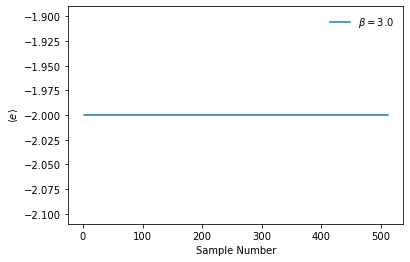

In [331]:
# Plot
plt.plot(sample_number,energy_per_spin_moving_average,label=r'$\beta=3.0$')
plt.ylabel(r'$\langle e \rangle$')
plt.xlabel("Sample Number");
plt.legend(frameon=False);

The reason that the data is seemingly equilibrated from the start is that in my implementation of the classical Monte Carlo Ising simulation, the Ising Lattice is initialized to all of them pointing up. That is, in the ferromagnetic ground state, which occurs for lower temperature $T$ or, alternatively, higher $\beta$

2b) We now know that we should perhaps throw out the first 100 bins for equilibration reasons. Now, let's take a look at: energy per spin and magnetization per spin, both as a function of temperature. This will be explored for an square Ising lattice of linear size $L=16$.

In [332]:
L = 16
total_sites = L**2

# Load the L=16 files
import os
L16_filenames = []
for subdir, dirs, files in os.walk('./Data/'):
    for filename in files:
        if filename.split('_')[1] == str(L): L16_filenames.append(filename)
L16_filenames = sorted(L16_filenames)

In [333]:
e = []
m = []

for file in L16_filenames:
    data = np.loadtxt('./Data/'+file)
    
    e_mean = np.mean(data[:,0][100:]/total_sites)
    m_mean = np.mean(data[:,1][100:]/total_sites)
    
    e.append(e_mean)
    m.append(m_mean)
    
e = np.array(e)
m = np.array(m)

In [334]:
# Retrieve temperatures for which we have data and store to array
temperatures = []
for filename in L16_filenames:
    temperatures.append(float(filename.split('_')[3].replace('.dat','')))
T = np.array(temperatures)

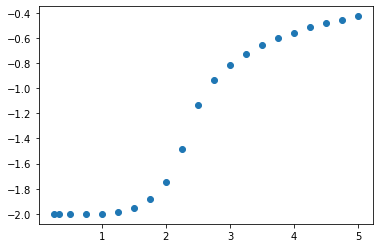

In [335]:
# Plot energy per spin vs temperature
plt.plot(T,e,'o')

In [339]:
def magnetization_exact_(T):
    '''We use units where J/k_B = 1.'''
    Tc = 2.0/np.log(1.0+np.sqrt(2.0))
    if T < Tc:
        return (1.0 - (1-np.tanh(1/T)**2)**4/(16*np.tanh(1/T)**4))**(-4)**(1.0/8)
    else:
        return 0.0
magnetization_exact = np.vectorize(magnetization_exact_)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-0.01, 1.04)

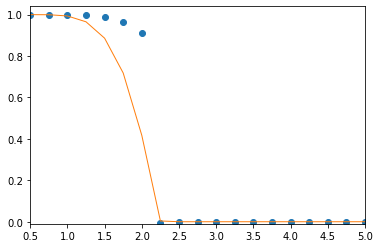

In [340]:
plt.plot(T,m,'o')
plt.plot(T,magnetization_exact(T),'-', linewidth=1, label='Exact')
plt.xlim(0.5,5.0)
plt.ylim(-0.01,1.04)

The above results are statistical average and should have an associated error, which is not plotted yet. To get the error bars of each point, we perform a binning analysis.

In [283]:
def get_std_error(mc_data):
    '''Input array and calculate standard error'''
    N_bins = np.shape(mc_data)[0]
    std_error = np.std(mc_data)/np.sqrt(N_bins)
    
    return std_error

def get_binned_data(mc_data):
    '''Return neighbor averaged data.'''
    N_bins = np.shape(mc_data)[0]
    start_bin = N_bins % 2
    binned_mc_data = 0.5*(mc_data[start_bin::2]+mc_data[start_bin+1::2]) #Averages (A0,A1), (A2,A3), + ... A0 ignored if odd data

    return binned_mc_data

In [317]:
data = np.loadtxt("./Data/L_16_T_1.0.dat")
M_data = data[:,0]

#Determine max bin level
max_bin_level = int(np.log2(np.shape(M_data)[0]))
min_bin = 16

#Initialize list to save standard error
std_errors = []

#Binning loop
binned_data = np.copy(M_data)
for i in range(max_bin_level):
    print(np.shape(binned_data)[0])
    std_errors.append(get_std_error(binned_data))   
    if np.shape(binned_data)[0]/2 <= min_bin: break
    binned_data = get_binned_data(binned_data)

512
256
128
64
32


Text(0.5, 0, '$Bin Level$')

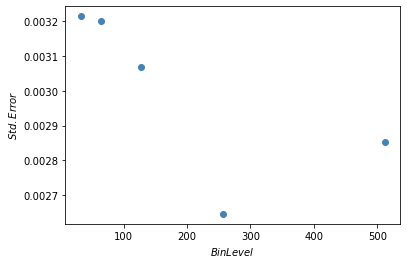

In [325]:
#Determine the number of bin levels
bin_levels = [float(i) for i in range(np.size(binned_data))]

#Plot
fig, ax1 = plt.subplots()
# ax1.plot(bin_levels,binned_data,'-',color='lightskyblue',label='9.9763')
ax1.plot([512,256,128,64,32][::-1],std_errors,'o',color='steelblue',label='9.9763')
#ax1.axhline(y=-1.71173196633913,linewidth=1,color="#cccccc",zorder=0)
#ax1.text(1.5,-0.4,r'Exact Egs: $-1.71173196633913$')
ax1.set_ylabel(r"$Std. Error$")
ax1.set_xlabel(r"$Bin Level$")
#ax1.set_xlim(data00[:,0][0],data00[:,0][325])
#ax1.set_xlim(data16b[:,0][0],data16b[:,0][-1])
#ax1.set_ylim(-2,6)
#plt.legend(ncol=2,title=r"$U$")

# plt.savefig("egserr_%i_%i_%.4f_%.4f_%i.pdf"%(L,N,U,v,M))

In [323]:
std_errors,bin_levels

([0.0032136441223200095,
  0.003198870268719005,
  0.0030694046844930013,
  0.0026464617445983852,
  0.0028535408377127216],
 [0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0])